In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [2]:
#loading the csv data to a Pandas DataFrame

data = pd.read_csv('gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
#number of rows and columns
data.shape

(2290, 6)

In [5]:
#getting some basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#checking the number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = data.corr()

<AxesSubplot:>

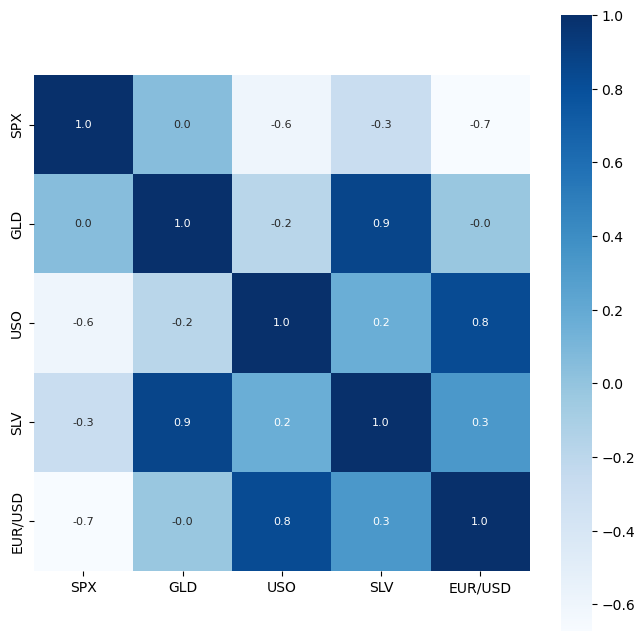

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\VICTUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

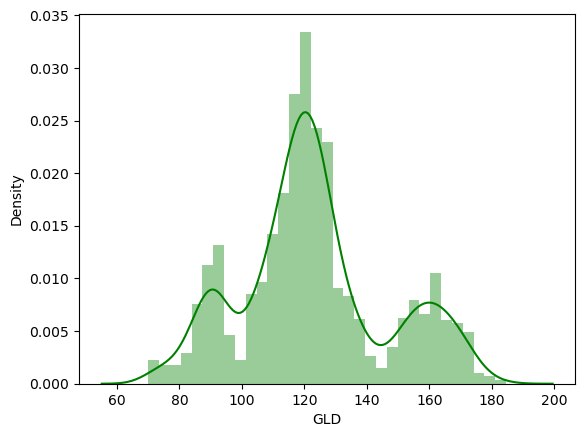

In [12]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='green')

# Splitting the Features and Target

In [13]:
x = data.drop(['Date','GLD'],axis=1)
y = data['GLD']

In [14]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training Data and Test Data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=2)

# Model Training

Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
#training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [20]:
# prediction on test data
test_data_prediction = regressor.predict(x_test)

In [21]:
print(test_data_prediction)

[168.6625998   81.38240015 116.01750014 127.55660065 120.9653013
 154.4438986  150.50039898 126.02750045 117.43289898 126.08110024
 116.81950093 170.70510083 142.14919818 167.79749888 115.19949972
 117.59930039 139.68520324 170.50720116 158.88660272 157.0459006
 155.06450048 125.07450036 175.84939935 157.61250384 125.15840073
  93.66149943  77.4654     120.61359984 119.13659933 167.62329982
  88.24250028 125.17350013  91.21470044 117.73350016 121.02649955
 136.58560015 115.53180115 115.35980089 148.50409976 107.054301
 104.18830259  87.02249763 126.50370063 117.86180024 153.20749878
 119.66410023 108.27539976 108.16289845  93.23120067 127.15089757
  74.46350033 113.6703992  121.25689997 111.29409863 118.92029895
 120.62759949 158.52760033 169.82870104 147.05679686  85.71369818
  94.32120046  86.95319856  90.6783003  118.92440075 126.45430075
 127.47130035 169.45280051 122.33349924 117.47899893  98.77370026
 167.89360051 143.15199898 131.58880206 121.20970213 121.00459932
 119.69730063 

In [22]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)

In [23]:
print('R squared error: ', error_score)

R squared error:  0.9884237731381796


# Compare the Actual Values and Predicted Values in a Plot

In [24]:
y_test = list(y_test)

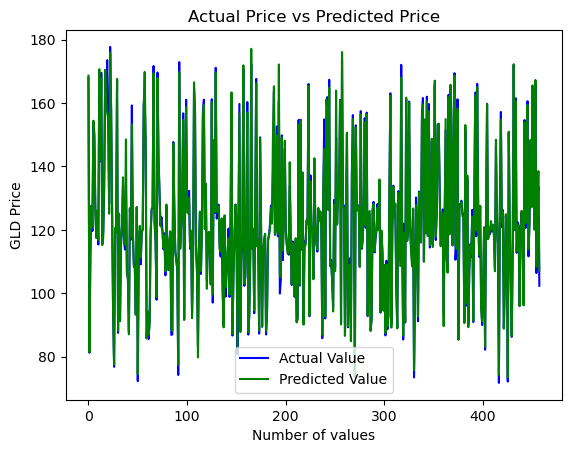

In [27]:
plt.plot(y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()